In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the raw_recipes and raw_interactions DataFrames
raw_recipes = pd.read_csv('raw_recipes.csv')
raw_interactions = pd.read_csv('raw_interactions.csv')

# Merge the two DataFrames on the id and recipe_id columns
merged_df = pd.merge(raw_recipes, raw_interactions, left_on='id', right_on='recipe_id', how='inner')

# Display the merged DataFrame
print(merged_df)

                                                 name      id  minutes   
0          arriba   baked winter squash mexican style  137739       55  \
1          arriba   baked winter squash mexican style  137739       55   
2          arriba   baked winter squash mexican style  137739       55   
3                    a bit different  breakfast pizza   31490       30   
4                    a bit different  breakfast pizza   31490       30   
...                                               ...     ...      ...   
1132362                     zydeco ya ya deviled eggs  308080       40   
1132363        cookies by design   cookies on a stick  298512       29   
1132364  cookies by design   sugar shortbread cookies  298509       20   
1132365  cookies by design   sugar shortbread cookies  298509       20   
1132366  cookies by design   sugar shortbread cookies  298509       20   

         contributor_id   submitted   
0                 47892  2005-09-16  \
1                 47892  2005-09-

## Missing Values

In [3]:
# Count missing values for each column
missing_values = merged_df.isnull().sum()

# Print the missing value counts
print(missing_values)

name                  1
id                    0
minutes               0
contributor_id        0
submitted             0
tags                  0
nutrition             0
n_steps               0
steps                 0
description       23510
ingredients           0
n_ingredients         0
user_id               0
recipe_id             0
date                  0
rating                0
review              169
dtype: int64


The only column with a significant amount of missing values is the description. There are also 169 interactions that involve a rating with no review.

# EDA

## Distribution of 'minutes'

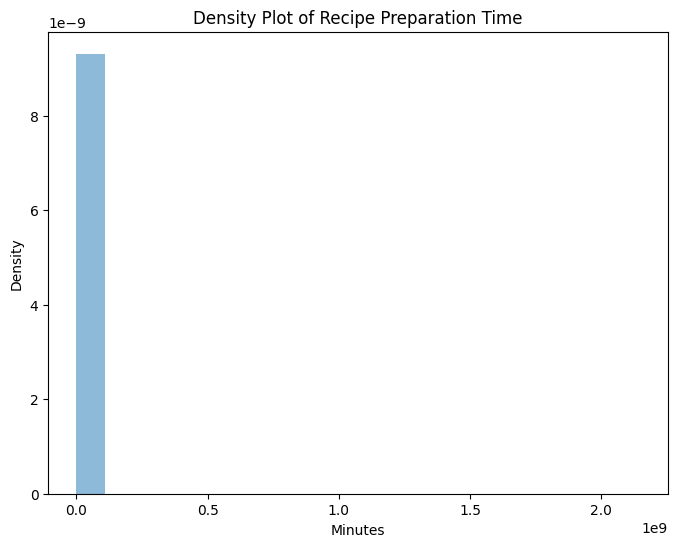

In [4]:
import matplotlib.pyplot as plt

# Select the columns of interest and drop duplicates
df = merged_df[['id', 'name', 'minutes']].drop_duplicates()

# Create a density plot of the minutes column
plt.figure(figsize=(8, 6))
plt.hist(df['minutes'], density=True, bins=20, alpha=0.5)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Density Plot of Recipe Preparation Time')
plt.show()

There are some strangely high values that are skewing the data. Let’s take a look.

In [5]:
# Select the columns of interest and drop duplicates
df = merged_df[['id', 'name', 'minutes']].drop_duplicates()

# Sort by minutes in descending order and show top 20 rows
top_20 = df.sort_values(by='minutes', ascending=False).head(20)

# Print the result
print(top_20)

             id                                             name     minutes
713702   261647                            no bake granola balls  2147483647
538592   447963                        how to preserve a husband     1051200
522682   291571                           homemade fruit liquers      288000
193161   216215    celtic druid s honey mead   meade   metheglin      259260
525747   425681                                 homemade vanilla      259205
771907    98912                                     peach brandy      216015
31383     70551                                 angelica liqueur      201610
876973    12931                                          rumtopf      187200
844641   172114                                raspberry liqueur      172810
262324   153634                                 cinnamon extract      172800
503916     2714                                 hard apple cider      167040
848678   236340  recipe for elephant stew  from griot s cookbook      146880

The top row is certainly an error so we will filter this out. In the context of this dataset, many of these high values seem strange but not easily identifiable as errors so we will put the graph on a logarithmic scale.

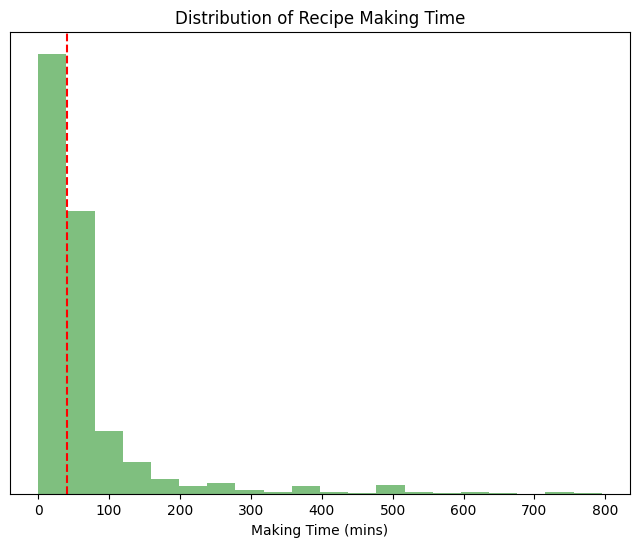

In [8]:
# Select the columns of interest and drop duplicates
df = merged_df[['id', 'name', 'minutes']].drop_duplicates()

# Filter out extremely large values
df = df[df['minutes'] < 800]

# Create a density plot of the minutes column
plt.figure(figsize=(8, 6))
plt.hist(df['minutes'], density=True, bins=20, alpha=0.5, color='green')
plt.axvline(x=np.median(df['minutes']), color='red', linestyle='--')
#plt.xscale('log')
plt.xlabel('Making Time (mins)')
plt.ylabel('')
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('Distribution of Recipe Making Time')
plt.show()

In [9]:
print(f"Median Recipe Making Time: {df['minutes'].median()} Minutes")


Median Recipe Making Time: 40.0 Minutes


## Distribution of Number of Steps

In [12]:
#plot = (ggplot(merged_df[['id', 'name', 'n_steps']].drop_duplicates(), aes(x='n_steps'))
#        + geom_histogram(fill='green', binwidth=1)
#        + geom_vline(xintercept=merged_df['n_steps'].median(), color='red', linetype='dashed')
#        + ggtitle("Distribution of Recipe Number of Steps")
#        + xlab("Number of Steps")
#        + ylab("Count"))
#
#print(plot)

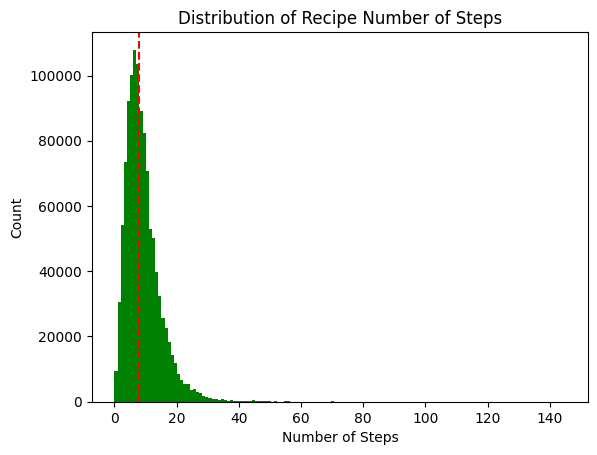

In [11]:

# Create a figure and axes objects
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(merged_df['n_steps'], bins=int(max(merged_df['n_steps']))-1, color='green')

# Add a vertical line for the median
ax.axvline(merged_df['n_steps'].median(), color='red', linestyle='dashed')

# Set the axis labels and title
ax.set_xlabel('Number of Steps')
ax.set_ylabel('Count')
ax.set_title('Distribution of Recipe Number of Steps')

# Display the plot
plt.show()


In [13]:
print(f"Median Number of Steps: {merged_df['n_steps'].median()}")


Median Number of Steps: 8.0


## Distribution of no. of ingredients

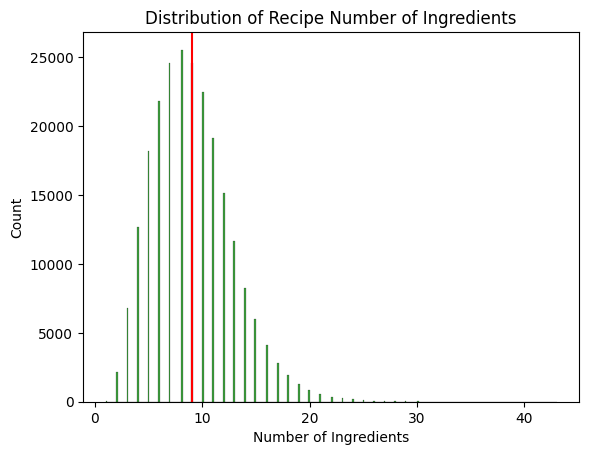

In [14]:
import seaborn as sns

sns.histplot(data=merged_df[['id', 'name', 'n_ingredients']].drop_duplicates(), x='n_ingredients', color='green')
plt.axvline(x=merged_df['n_ingredients'].median(), color='red')
plt.title('Distribution of Recipe Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Count')
plt.show()


In [15]:
print(f"Median Number of Ingredients: {merged_df['n_ingredients'].median()}")


Median Number of Ingredients: 9.0


## Distribution of ratings

In [ ]:
print(f"Mean Rating: {round(merged_df['rating'].mean(), 2)}")


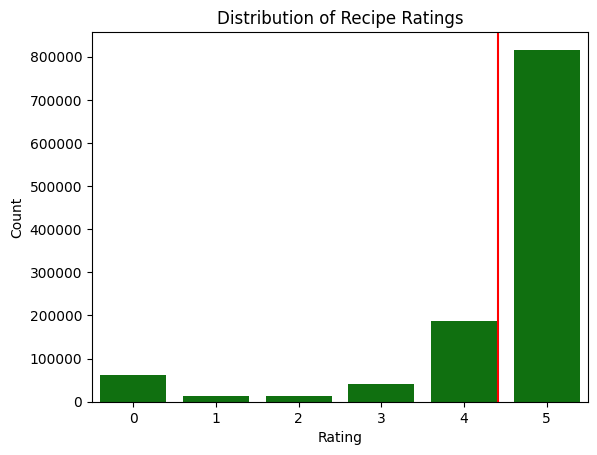

In [16]:
sns.countplot(data=merged_df[['rating']], x='rating', color='green')
plt.axvline(x=merged_df['rating'].mean(), color='red')
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(ticks=[0,1,2,3,4,5])
plt.show()


Most people rate the recipes very positively (a 0 means the user hasn’t tried the recipe).

In [ ]:
# Select relevant columns and remove rows with missing values
corr_values = merged_df[['minutes', 'n_steps', 'n_ingredients', 'rating', 'submitted', 'review']].dropna()



In [ ]:
# Compute correlation matrix
corrmat = np.corrcoef(corr_values.values.T)


In [ ]:
# Create a heatmap using seaborn
sns.set(font_scale=1.2)
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            xticklabels=corr_values.columns.values, yticklabels=corr_values.columns.values)

In [ ]:
ingredients = merged_df[['ingredients', 'rating']].explode('ingredients')
ingredients = ingredients['ingredients'].str.split(', ', expand=True)
ingredients['rating'] = ingredients['rating'].astype(float)


In [ ]:
ingredients

In [ ]:
merged_df.head(10)